### Initial exploratory data analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.max_rows', 150)

In [3]:
# Inspect the schema
schema2018 = pd.read_csv('data/2018/survey_results_schema.csv')
schema2018.head(10)

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order of survey response time)
1,Hobby,Do you code as a hobby?
2,OpenSource,Do you contribute to open source projects?
3,Country,In which country do you currently reside?
4,Student,"Are you currently enrolled in a formal, degree-granting college or university program?"
5,Employment,Which of the following best describes your current employment status?
6,FormalEducation,Which of the following best describes the highest level of formal education that you’ve completed?
7,UndergradMajor,You previously indicated that you went to a college or university. Which of the following best describes your main field of study (aka 'major')
8,CompanySize,Approximately how many people are employed by the company or organization you work for?
9,DevType,Which of the following describe you? Please select all that apply.


In [4]:
# An overview of the data
data2018 = pd.read_csv('data/2018/survey_results_public.csv', low_memory=False)
data2018.head(3)

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, physics)","10,000 or more employees",Database administrator;DevOps specialist;Full-stack developer;System administrator,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or software engineering",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Print number of observations in 2018
data2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98855 entries, 0 to 98854
Columns: 129 entries, Respondent to SurveyEasy
dtypes: float64(41), int64(1), object(87)
memory usage: 97.3+ MB


In [6]:
# Print the interesting columns
[c for c in data2018.iloc[:, [1, 2, 9, 10, 11, 12, 13, 14, 15, 53, 54, 56,62,63,64,
                              65,66,67,68,69,70,71,72,73,74,93,94,95,96,97,98,99,100,114,
                             115,116,117,118,119,121,122,123,124,125,127,128]].columns]

['Hobby',
 'OpenSource',
 'DevType',
 'YearsCoding',
 'YearsCodingProf',
 'JobSatisfaction',
 'CareerSatisfaction',
 'HopeFiveYears',
 'JobSearchStatus',
 'SalaryType',
 'ConvertedSalary',
 'CommunicationTools',
 'AgreeDisagree1',
 'AgreeDisagree2',
 'AgreeDisagree3',
 'LanguageWorkedWith',
 'LanguageDesireNextYear',
 'DatabaseWorkedWith',
 'DatabaseDesireNextYear',
 'PlatformWorkedWith',
 'PlatformDesireNextYear',
 'FrameworkWorkedWith',
 'FrameworkDesireNextYear',
 'IDE',
 'OperatingSystem',
 'AIDangerous',
 'AIInteresting',
 'AIResponsible',
 'AIFuture',
 'EthicsChoice',
 'EthicsReport',
 'EthicsResponsible',
 'EthicalImplications',
 'WakeTime',
 'HoursComputer',
 'HoursOutside',
 'SkipMeals',
 'ErgonomicDevices',
 'Exercise',
 'SexualOrientation',
 'EducationParents',
 'RaceEthnicity',
 'Age',
 'Dependents',
 'SurveyTooLong',
 'SurveyEasy']

In [7]:
# Determine columns concerning language
data2018.filter(like='Lang', axis=1).head()

,LanguageWorkedWith,LanguageDesireNextYear
0,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS
1,JavaScript;Python;Bash/Shell,Go;Python
2,NaN,NaN
3,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell
4,C;C++;Java;Matlab;R;SQL;Bash/Shell,Assembly;C;C++;Matlab;SQL;Bash/Shell


In [8]:
# First we get all the different languages
delimiter = ';'
all_languages = data2018.LanguageWorkedWith.apply(lambda c: str(c).split(delimiter))

# Make a flat list out of the list of lists
all_languages = [language for languagelist in all_languages for language in languagelist]

# No cleanup the list from nan values and duplicates
all_languages = list(filter(lambda l: l != 'nan', all_languages))
all_languages = set(all_languages)

all_languages

{'Assembly',
 'Bash/Shell',
 'C',
 'C#',
 'C++',
 'CSS',
 'Clojure',
 'Cobol',
 'CoffeeScript',
 'Delphi/Object Pascal',
 'Erlang',
 'F#',
 'Go',
 'Groovy',
 'HTML',
 'Hack',
 'Haskell',
 'Java',
 'JavaScript',
 'Julia',
 'Kotlin',
 'Lua',
 'Matlab',
 'Objective-C',
 'Ocaml',
 'PHP',
 'Perl',
 'Python',
 'R',
 'Ruby',
 'Rust',
 'SQL',
 'Scala',
 'Swift',
 'TypeScript',
 'VB.NET',
 'VBA',
 'Visual Basic 6'}

In [9]:
# Now we want to make columns out of the languages for better processing
for language in all_languages:
    data2018[language] = data2018['LanguageWorkedWith'].map(lambda c: language in str(c).split(delimiter))

In [10]:
data2018.loc[:, 'C#':].head()

,C#,VB.NET,Scala,Matlab,Delphi/Object Pascal,F#,Python,Visual Basic 6,R,HTML,...,SQL,TypeScript,Assembly,Lua,PHP,Groovy,Cobol,Java,Ocaml,Go
0,False,False,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,True,...,True,True,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,True,False,...,True,False,False,False,False,False,False,True,False,False


### Compare C# to Python

In [11]:
def csharp_or_python(col):
    ''' Function for making composite column of C# and Python '''
    if col['C#'] and col['Python']:
        return 'Both'
    elif col['C#']:
        return 'C#'
    elif col['Python']:
        return 'Python'
    return 'None'

In [12]:
# Creating combined column
data2018['C# vs Python'] = data2018.apply(lambda col: csharp_or_python(col), axis=1)

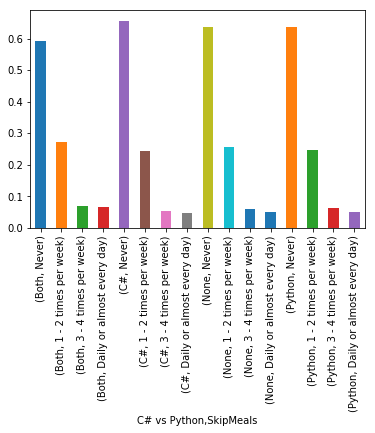

In [16]:
# Inspect some habbits over the different groups
data2018.groupby('C# vs Python')['SkipMeals'].value_counts(normalize=True).plot(kind='bar')
plt.show()

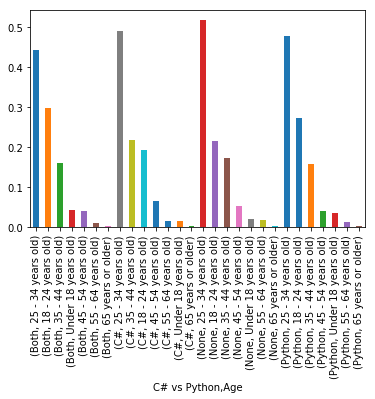

In [17]:
# Inspect the age of the groups
data2018.groupby('C# vs Python')['Age'].value_counts(normalize=True).plot(kind='bar')
plt.show()

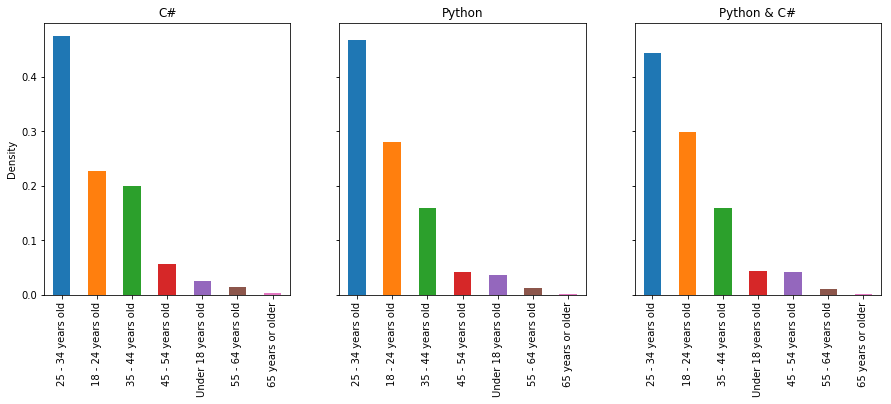

In [21]:
# Separate the different groups into subplots
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5), sharey=True)
data2018[data2018['C#'] == True].Age.value_counts(normalize=True).plot(kind='bar', ax=ax1)
ax1.set_title('C#')
data2018[data2018['Python'] == True].Age.value_counts(normalize=True).plot(kind='bar', ax=ax2)
ax2.set_title('Python')
data2018[(data2018['Python'] == True) & (data2018['C#'] == True)].Age.value_counts(normalize=True).plot(kind='bar', ax=ax3)
ax3.set_title('Python & C#')
ax1.set_ylabel('Density')
plt.show()

As expected the python programmers are of younger age compared to the c# hackers

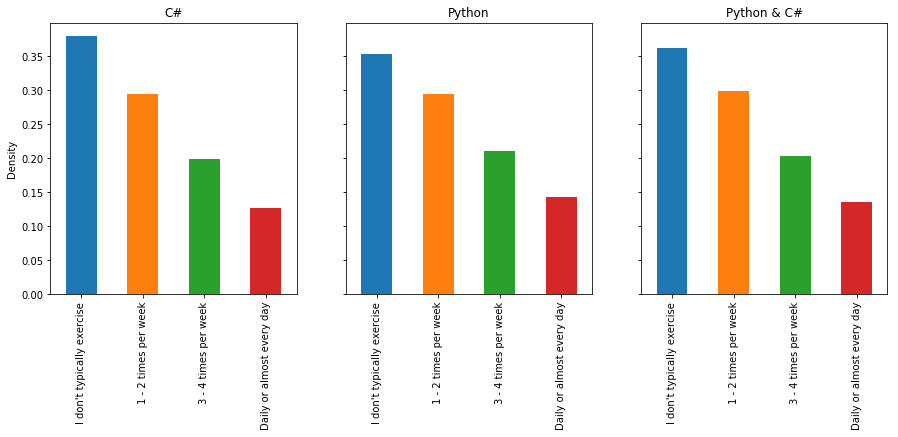

In [23]:
# How often do the different groups exercise
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15, 5), sharey=True)
data2018[data2018['C#'] == True].Exercise.value_counts(normalize=True).plot(kind='bar', ax=ax1)
ax1.set_title('C#')
data2018[data2018['Python'] == True].Exercise.value_counts(normalize=True).plot(kind='bar', ax=ax2)
ax2.set_title('Python')
data2018[(data2018['Python'] == True) & (data2018['C#'] == True)].Exercise.value_counts(normalize=True).plot(kind='bar', ax=ax3)
ax3.set_title('Python & C#')
ax1.set_ylabel('Density')
plt.show()

In [24]:
# Comparing the groups in numbers
data2018.Exercise.value_counts(normalize=True)

I don't typically exercise    0.374369
1 - 2 times per week          0.290287
3 - 4 times per week          0.198563
Daily or almost every day     0.136781
Name: Exercise, dtype: float64

In [25]:
data2018.groupby('C# vs Python')['Exercise'].value_counts(normalize=True)

C# vs Python  Exercise                  
Both          I don't typically exercise    0.361083
              1 - 2 times per week          0.298774
              3 - 4 times per week          0.203779
              Daily or almost every day     0.136364
C#            I don't typically exercise    0.389060
              1 - 2 times per week          0.291703
              3 - 4 times per week          0.196814
              Daily or almost every day     0.122423
None          I don't typically exercise    0.387179
              1 - 2 times per week          0.285789
              3 - 4 times per week          0.188706
              Daily or almost every day     0.138326
Python        I don't typically exercise    0.348757
              1 - 2 times per week          0.292288
              3 - 4 times per week          0.212349
              Daily or almost every day     0.146605
Name: Exercise, dtype: float64

IndexError: index 6 is out of bounds for axis 1 with size 6

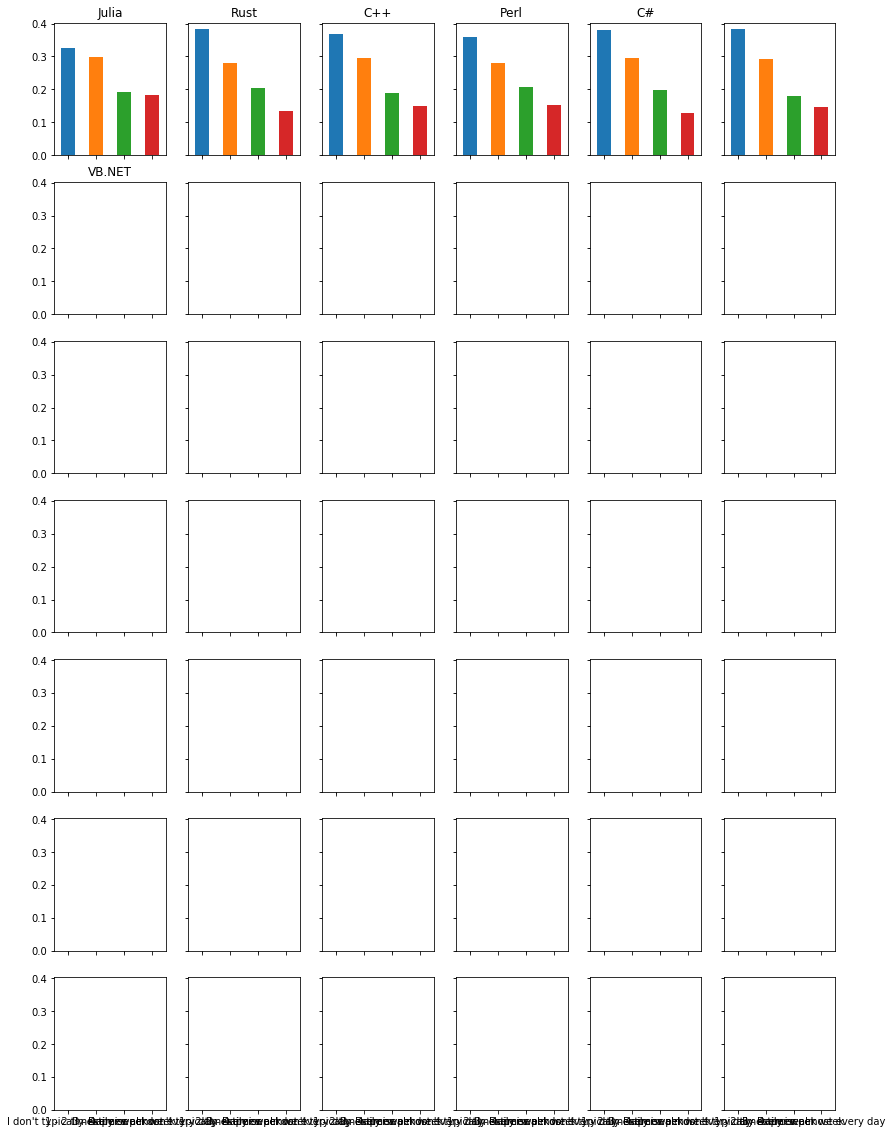

In [30]:
fig, axes = plt.subplots(7,6, figsize=(14, 20), sharey=True, sharex=True)
for i, lang in zip(range(38), all_languages):
    data2018[data2018[lang] == True].Exercise.value_counts(normalize=True).plot(kind='bar', ax=axes[int(i/6), i%7])
    axes[int(i/5), i%5].set_title(lang)

In [30]:
# Chi-Squared Test of Independence
pd.crosstab(data2018['C# vs Python'], data2018.Exercise, normalize=True)

Exercise,1 - 2 times per week,3 - 4 times per week,Daily or almost every day,I don't typically exercise
C# vs Python,,,,
Both,0.032451,0.022133,0.014811,0.039219
C#,0.065527,0.044211,0.027500,0.087397
None,0.113205,0.074749,0.054793,0.153367
Python,0.079104,0.057469,0.039677,0.094386


Try it with the functional programmers!

### First we only compare the distributions

In [31]:
# Calculate the chi square ourselves with the chi square formular

$$ \chi^2 = \sum_{1}^{z}\frac{(o_z-e_z)^2}{e^z} $$

In [32]:
import numpy as np

In [33]:
population_ratio = data2018.Exercise.value_counts(dropna=True, sort=True, normalize=True)
population_ratio.sort_index()

1 - 2 times per week          0.290287
3 - 4 times per week          0.198563
Daily or almost every day     0.136781
I don't typically exercise    0.374369
Name: Exercise, dtype: float64

In [34]:
python_programmers = data2018[data2018['Python'] == True]
expected_count = population_ratio * len(python_programmers)
expected_count.sort_index()

1 - 2 times per week           8812.816719
3 - 4 times per week           6028.182199
Daily or almost every day      4152.532548
I don't typically exercise    11365.468533
Name: Exercise, dtype: float64

In [35]:
actual_count = python_programmers.Exercise.value_counts(dropna=True, sort=True)
actual_count.sort_index()

1 - 2 times per week          8044
3 - 4 times per week          5740
Daily or almost every day     3929
I don't typically exercise    9634
Name: Exercise, dtype: int64

In [36]:
(((actual_count.sort_index()-expected_count.sort_index()) ** 2)/expected_count.sort_index()).sum()

356.6600362751675

In [37]:
# Calculating the chi square statistic
chi_squared_stat = (((actual_count.sort_index()-expected_count.sort_index()) ** 2)/expected_count.sort_index()).sum()

In [38]:
print(chi_squared_stat)

356.6600362751675


In [39]:
# First we want to find the critical value for 95% confidence

import scipy.stats as stats

# Degree of freedom is 5-1 =
crit = stats.chi2.ppf(q = 0.95, df = 3)
print(crit)

7.814727903251179


In [40]:
# And now we calcualte the t-value
p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  df=3)
p_value

0.0

In [41]:
# Now we calculate all this with scipy
stats.chisquare(f_obs= actual_count,   
                f_exp= expected_count)   

Power_divergenceResult(statistic=356.66003627516744, pvalue=5.389358103510067e-77)

In [42]:
# So there is a dependence between the two variables exercise and python or not
population_ratio = data2018.AIFuture.value_counts(dropna=True, normalize=True)
population_ratio

I'm excited about the possibilities more than worried about the dangers.        0.728158
I'm worried about the dangers more than I'm excited about the possibilities.    0.190297
I don't care about it, or I haven't thought about it.                           0.081545
Name: AIFuture, dtype: float64

In [43]:
python_ratio = python_programmers.AIFuture.value_counts(dropna=True, normalize=True)
python_ratio

I'm excited about the possibilities more than worried about the dangers.        0.765832
I'm worried about the dangers more than I'm excited about the possibilities.    0.167864
I don't care about it, or I haven't thought about it.                           0.066304
Name: AIFuture, dtype: float64

In [44]:
# Now we calculate all this with scipy
stats.chisquare(f_obs= python_programmers.AIFuture.value_counts(dropna=True),   
                f_exp= population_ratio * len(python_programmers))  

Power_divergenceResult(statistic=442.55735100425204, pvalue=7.941312138124615e-97)

Since our chi-squared statistic exceeds the critical value, we'd reject the null hypothesis that the two distributions are the same.

In [45]:
# Andere interessante Fragen
# Zufriedenheit bei funktionalen und nicht-funktionalen Sprachen
# Entwicklung der funktionalen Sprachen -> Time-Serie

### Next we check for independence

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
exercise_data_with_margin = pd.crosstab(data2018['C# vs Python'], data2018.Exercise, margins=True)
exercise_data_with_margin

Exercise,1 - 2 times per week,3 - 4 times per week,Daily or almost every day,I don't typically exercise,All
C# vs Python,,,,,
Both,2340,1596,1068,2828,7832
C#,4725,3188,1983,6302,16198
None,8163,5390,3951,11059,28563
Python,5704,4144,2861,6806,19515
All,20932,14318,9863,26995,72108


In [48]:
exercise_data = exercise_data_with_margin.iloc[0:4, 0:4]
exercise_data

Exercise,1 - 2 times per week,3 - 4 times per week,Daily or almost every day,I don't typically exercise
C# vs Python,,,,
Both,2340,1596,1068,2828
C#,4725,3188,1983,6302
None,8163,5390,3951,11059
Python,5704,4144,2861,6806


In [49]:
exercise_data_with_margin.iloc[0:4, 4]

C# vs Python
Both       7832
C#        16198
None      28563
Python    19515
Name: All, dtype: int64

In [50]:
exercise_data_with_margin.iloc[4, :]

Exercise
1 - 2 times per week          20932
3 - 4 times per week          14318
Daily or almost every day      9863
I don't typically exercise    26995
All                           72108
Name: All, dtype: int64

In [51]:
# now we calculate the expected count
expected = np.outer(exercise_data_with_margin.iloc[0:4, 4], exercise_data_with_margin.iloc[4, 0:4]) \
    / exercise_data_with_margin.iloc[4,4]
expected

array([[ 2273.52615521,  1555.14750097,  1071.26831974,  2932.05802407],
       [ 4702.06545737,  3216.3277861 ,  2215.57766129,  6064.02909525],
       [ 8291.46164087,  5671.56257281,  3906.8739807 , 10693.10180562],
       [ 5664.94674655,  3874.96214012,  2669.28003828,  7305.81107505]])

In [52]:
# Again we can calculate the chi squared statistics with the same formula es above
chi_squared_stat = (((exercise_data-expected)**2)/expected).sum().sum()
chi_squared_stat

136.73358988551269

In [53]:
# Again we calculate the critical values
critical = stats.chi2.ppf(q = 0.95, df = (5-1) * (4-1)) 

print('Critical value: %.8f' % critical)

Critical value: 21.02606982


In [54]:
# And we calculate our p value
p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=(5-1) * (4-1))
print("P_value: %.6f" % p_value)

P_value: 0.000000


## Lets visualize the probabilities of our $\chi^2$ distribution

In [55]:
X = np.linspace(0, 150, 1000)

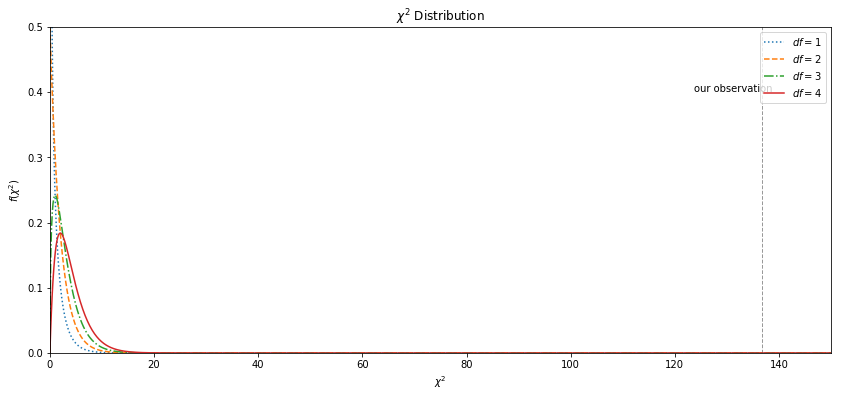

In [56]:
fig, ax = plt.subplots(1, figsize=(14, 6))
linestyles = [':','--','-.','-']
degree_of_freedom = [1, 2, 3, 4]
for df, ls in zip(degree_of_freedom, linestyles):
    ax.plot(X, stats.chi2.pdf(X, df), linestyle=ls, label=r'$df=%i$' % df)

plt.xlim(0, 150)
plt.ylim(0, .5)

plt.xlabel('$\chi^2$')
plt.ylabel(r'$f(\chi^2)$')
plt.title(r'$\chi^2\ \mathrm{Distribution}$')

# Visualize our critical value
plt.vlines(chi_squared_stat, 0, .5, linewidth=1, linestyle='--', alpha=.4)
plt.text(chi_squared_stat-13, .4, 'our observation')

plt.legend()
plt.show()

## Enter the time warp

In [57]:
#data2018 = pd.read_csv('data/2018/survey_results_public.csv')
!ls data

2011
2012
2013
2014
2015
2016
2017
2018


In [58]:
# First we make shure, that the schema looks the same
data2011 = pd.read_csv('data/2011/2011 Stack Overflow Survey Results.csv', encoding = 'ISO-8859-1', delimiter=',')
data2011.columns[:5]

Index(['What Country or Region do you live in?',
       'Which US State or Territory do you live in?', 'How old are you?',
       'How many years of IT/Programming experience do you have?',
       'How would you best describe the industry you work in?'],
      dtype='object')

In [59]:
data2012 = pd.read_csv('data/2012/2012 Stack Overflow Survey Results.csv', encoding = 'ISO-8859-1', delimiter=',')
data2012.columns[:5]

Index(['What Country or Region do you live in?',
       'Which US State or Territory do you live in?', 'How old are you?',
       'How many years of IT/Programming experience do you have?',
       'How would you best describe the industry you currently work in?'],
      dtype='object')

Well, they are not at all the same. Unnamed columns are subcolumns.

### Make a subset of all the years with only the relevant columns 
* C# and Python
* job satisfaction
* age
* annual compensation

#### 2011

In [289]:
data2011.head()

,What Country or Region do you live in?,Which US State or Territory do you live in?,How old are you?,How many years of IT/Programming experience do you have?,How would you best describe the industry you work in?,Which best describes the size of your company?,Which of the following best describes your occupation?,How likely is it that a recommendation you make will be acted upon?,What is your involvement in purchasing? You can choose more than 1.,Unnamed: 9,...,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,"In the last 12 months, how much money have you spent on personal technology-related purchases?",Which of our sites do you frequent most?
0,Response,Response,Response,Response,Response,Response,Response,Response,Influencer,Recommender,...,AppleTV,iPad,Other netbook,PS3,Xbox,Wii,Other gaming system,other (please specify),Response,Response
1,Africa,NaN,< 20,<2,Consulting,Start Up (1-25),Web Application Developer,Not in a million years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<$100,NaN
2,Other Europe,NaN,25-29,41310,Software Products,Mature Small Business (25-100),Server Programmer,It's been known to happen,NaN,NaN,...,NaN,NaN,Other netbook,NaN,NaN,NaN,NaN,NaN,$251-$500,Stack Overflow
3,India,NaN,25-29,41435,Software Products,Mid Sized (100-999),Server Programmer,Unless it's stoopid it gets done,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Germany,NaN,< 20,41310,Foundation / Non-Profit,Student,Student,It's been known to happen,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Wii,Other gaming system,NaN,"$501-$1,000",Stack Overflow


In [290]:
# Remove first row and add column for year
subset2011 = data2011.iloc[1:, [2, 44, 45, 37, 34]]
subset2011['year'] = 2011
subset2011.head(4)

,How old are you?,Please rate your job/career satisfaction,"Including bonus, what is your annual compensation in USD?",Unnamed: 37,Unnamed: 34,year
1,< 20,FML,Student / Unemployed,NaN,NaN,2011
2,25-29,So happy it hurts,NaN,NaN,NaN,2011
3,25-29,NaN,NaN,NaN,NaN,2011
4,< 20,I enjoy going to work,Student / Unemployed,NaN,NaN,2011


In [291]:
subset_columns = ['age', 'job_satisfaction', 'annual_compensation', 'csharp', 'python', 'year'] 
subset2011.columns = subset_columns

In [292]:
# We transform languages in boolean columns
subset2011['csharp'] = subset2011['csharp'].apply(lambda c: c == 'C#')
subset2011['python'] = subset2011['python'].apply(lambda c: c == 'Python')

In [293]:
subset2011['python_and_csharp'] = subset2011['csharp'] & subset2011['python']

In [294]:
# reorder columns for sanity
subset2011 = subset2011.iloc[:, [5,0, 1,2,3,4,6]]

In [295]:
subset2011.head(10)

,year,age,job_satisfaction,annual_compensation,csharp,python,python_and_csharp
1,2011,< 20,FML,Student / Unemployed,False,False,False
2,2011,25-29,So happy it hurts,NaN,False,False,False
3,2011,25-29,NaN,NaN,False,False,False
4,2011,< 20,I enjoy going to work,Student / Unemployed,False,False,False
5,2011,35-39,It pays the bills,"$80,000 - $100,000",False,False,False
6,2011,35-39,So happy it hurts,NaN,True,False,False
7,2011,20-24,It pays the bills,"$20,000 - $40,000",True,True,True
8,2011,20-24,I enjoy going to work,"$80,000 - $100,000",False,False,False
9,2011,35-39,I enjoy going to work,"$80,000 - $100,000",True,False,False
10,2011,NaN,NaN,NaN,False,False,False


#### 2012

In [296]:
subset2012 = data2012.iloc[1:, [2, 38, 39, 30, 26]]
subset2012['year'] = 2012
subset2012.columns = subset_columns
subset2012.head(5)

,age,job_satisfaction,annual_compensation,csharp,python,year
1,20-24,Love my job,"<$20,000",NaN,NaN,2012
2,25-29,I enjoy going to work,"$20,000 - $40,000",NaN,NaN,2012
3,20-24,I enjoy going to work,"$20,000 - $40,000",NaN,NaN,2012
4,20-24,I'm not happy in my job,"$20,000 - $40,000",NaN,NaN,2012
5,< 20,I wish I had a job!,Student / Unemployed,NaN,NaN,2012


In [297]:
def cleanup_languages(df):
    df['csharp'] = df['csharp'].apply(lambda c: c == 'C#')
    df['python'] = df['python'].apply(lambda c: c == 'Python')
    df['python_and_csharp'] = df['csharp'] & df['python']

In [298]:
cleanup_languages(subset2012)

In [299]:
subset2012 = subset2012.loc[:, ['year', 'age', 'job_satisfaction', 'annual_compensation', 'csharp', 'python', 'python_and_csharp']]

In [300]:
subset2012.head(5)

,year,age,job_satisfaction,annual_compensation,csharp,python,python_and_csharp
1,2012,20-24,Love my job,"<$20,000",False,False,False
2,2012,25-29,I enjoy going to work,"$20,000 - $40,000",False,False,False
3,2012,20-24,I enjoy going to work,"$20,000 - $40,000",False,False,False
4,2012,20-24,I'm not happy in my job,"$20,000 - $40,000",False,False,False
5,2012,< 20,I wish I had a job!,Student / Unemployed,False,False,False


In [301]:
(subset2011.columns == subset2012.columns).all()

True

In [302]:
def print_all(subsets):
    for subset in subsets:
        print('%s \t%s (year/observations)' % (subset.iloc[0,0], len(subset)))

In [303]:
print_all([subset2011, subset2012])

2011 	2813 (year/observations)
2012 	6243 (year/observations)


#### 2013

In [304]:
data2013 = pd.read_csv('data/2013/2013 Stack Overflow Survey Responses.csv', encoding = 'ISO-8859-1', delimiter=',')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (46,48,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [305]:
import numpy as np

In [306]:
keywords = ['compensation','language','satisfaction', 'ow old', 'age', 'c#','python']
def find_columns(df):
    for c in df.columns.values:
        for key in keywords:
            if str(c).lower().find(key) >= 0:
                print('%s %s' % (np.where(df.columns.values == c)[0], c))
                break

In [307]:
find_columns(data2013)

[2] How old are you?
[34] In an average week, how do you spend your time?
[56] Which of the following languages or technologies have you used significantly in the past year?
[99] What best describes your career / job satisfaction?
[100] Including bonus, what is your annual compensation in USD?


In [308]:
data2013.iloc[1:, [2, 99, 100, 58, 66]].head()

,How old are you?,What best describes your career / job satisfaction?,"Including bonus, what is your annual compensation in USD?",Unnamed: 58,Unnamed: 66
1,35-39,It's a paycheck,"$80,000 - $100,000",NaN,NaN
2,25-29,It's a paycheck,"$20,000 - $40,000",C#,NaN
3,51-60,I'm not happy in my job,"$120,000 - $140,000",C#,NaN
4,NaN,NaN,NaN,NaN,NaN
5,35-39,NaN,NaN,NaN,NaN


In [309]:
subset2013 = data2013.iloc[1:, [2, 99, 100, 58, 66]]
subset2013['year'] = 2013
subset2013.columns = subset_columns
subset2013.head(4)

,age,job_satisfaction,annual_compensation,csharp,python,year
1,35-39,It's a paycheck,"$80,000 - $100,000",NaN,NaN,2013
2,25-29,It's a paycheck,"$20,000 - $40,000",C#,NaN,2013
3,51-60,I'm not happy in my job,"$120,000 - $140,000",C#,NaN,2013
4,NaN,NaN,NaN,NaN,NaN,2013


In [310]:
cleanup_languages(subset2013)

In [311]:
def cleanup_order(df):
    return df.loc[:, ['year', 'age', 'job_satisfaction', 'annual_compensation', 'csharp', 'python', 'python_and_csharp']]

In [312]:
subset2013 = cleanup_order(subset2013)

In [313]:
subset2013.head()

,year,age,job_satisfaction,annual_compensation,csharp,python,python_and_csharp
1,2013,35-39,It's a paycheck,"$80,000 - $100,000",False,False,False
2,2013,25-29,It's a paycheck,"$20,000 - $40,000",True,False,False
3,2013,51-60,I'm not happy in my job,"$120,000 - $140,000",True,False,False
4,2013,NaN,NaN,NaN,False,False,False
5,2013,35-39,NaN,NaN,False,False,False


In [314]:
print_all([subset2011, subset2012, subset2013])

2011 	2813 (year/observations)
2012 	6243 (year/observations)
2013 	9742 (year/observations)


In [315]:
def print_all():
    existing_sets = list()
    for year in range(2011, 2019):
        key = 'subset{0}'.format(year)
        if key in globals().keys():
            subset = globals()[key]
            print('%s \t%s (year/observations)' % (subset.iloc[0,0], len(subset)))
            existing_sets.append(subset)
        else:
            print('%s\t not loaded' % year)
    schema = existing_sets[0].columns
    all_equal = True
    for s in existing_sets:
        if len(s.columns) != len(schema) or (s.columns != schema).any():
            all_equal = False
            break
    print('%s sets loaded, all columns equal: %s' % (len(existing_sets), all_equal))

In [316]:
print_all()

2011 	2813 (year/observations)
2012 	6243 (year/observations)
2013 	9742 (year/observations)
2014 	7643 (year/observations)
2015 	26086 (year/observations)
2016 	56030 (year/observations)
2017 	51392 (year/observations)
2018 	98855 (year/observations)
8 sets loaded, all columns equal: True


#### 2014

In [317]:
data2014 = pd.read_csv('data/2014/2014 Stack Overflow Survey Responses.csv', encoding = 'ISO-8859-1', delimiter=',')

In [318]:
find_columns(data2014)

[3] How old are you?
[7] Including bonus, what is your annual compensation in USD?
[20] In an average week, how do you spend your time at work?
[42] Which of the following languages or technologies have you used significantly in the past year?
[92] In receiving an email about a job opportunity, what attributes of the message would make you more likely to respond?


Job satisfaction was not measured in 2014!

In [319]:
subset2014 = data2014.iloc[1:, [3, 7, 44, 50]]
subset2014['job_satisfaction'] = np.nan
subset2014['year'] = 2014

In [320]:
subset2014.head()

,How old are you?,"Including bonus, what is your annual compensation in USD?",Unnamed: 44,Unnamed: 50,job_satisfaction,year
1,30-34,"$20,000 - $40,000",NaN,Python,NaN,2014
2,20-24,Student / Unemployed,NaN,NaN,NaN,2014
3,25-29,"<$20,000",C#,NaN,NaN,2014
4,< 20,Student / Unemployed,NaN,NaN,NaN,2014
5,25-29,Rather not say,NaN,NaN,NaN,2014


In [321]:
subset2014 = subset2014.iloc[:, [0, 4, 1, 2, 3, 5]]
subset2014.columns = ['age', 'job_satisfaction', 'annual_compensation', 'csharp', 'python', 'year']
subset2014.head(3)

,age,job_satisfaction,annual_compensation,csharp,python,year
1,30-34,NaN,"$20,000 - $40,000",NaN,Python,2014
2,20-24,NaN,Student / Unemployed,NaN,NaN,2014
3,25-29,NaN,"<$20,000",C#,NaN,2014


In [322]:
cleanup_languages(subset2014)

In [323]:
subset2014 = cleanup_order(subset2014)
subset2014.head(3)

,year,age,job_satisfaction,annual_compensation,csharp,python,python_and_csharp
1,2014,30-34,NaN,"$20,000 - $40,000",False,True,False
2,2014,20-24,NaN,Student / Unemployed,False,False,False
3,2014,25-29,NaN,"<$20,000",True,False,False


In [324]:
print_all()

2011 	2813 (year/observations)
2012 	6243 (year/observations)
2013 	9742 (year/observations)
2014 	7643 (year/observations)
2015 	26086 (year/observations)
2016 	56030 (year/observations)
2017 	51392 (year/observations)
2018 	98855 (year/observations)
8 sets loaded, all columns equal: True


#### 2015

In [325]:
data2015 = pd.read_csv('data/2015/2015 Stack Overflow Developer Survey Responses.csv', encoding = 'ISO-8859-1', 
                       delimiter=',', header=1)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (5,108,121,196,197,198) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [326]:
data2015.head(2)

,Country,Age,Gender,Tabs or Spaces,Years IT / Programming Experience,Occupation,Desktop Operating System,Desktop Operating System: write-in,Current Lang & Tech: Android,Current Lang & Tech: Arduino,...,Why use Stack Overflow: I don't use Stack Overflow,How often are Stack Overflow's answers helpful,Why answer: Help a programmer in need,Why answer: Help future programmers,Why answer: Demonstrate expertise,Why answer: Self promotion,Why answer: Sense of responsibility to developers,Why answer: No idea,Why answer: I don't answer and I don't want to,Why answer: I don't answer but I want to
0,Croatia,25-29,Male,Tabs,2 - 5 years,Back-end web developer,Ubuntu,NaN,NaN,NaN,...,NaN,Usually,NaN,NaN,It feels good to demonstrate my expertise.,Demonstrating my expertise will benefit me,I feel a sense of responsibility to the developer community,NaN,NaN,NaN
1,France,20-24,Male,Spaces,1 - 2 years,Back-end web developer,Windows 7,NaN,NaN,NaN,...,NaN,Usually,NaN,My answer will help lots of people who have the same problem in the future,It feels good to demonstrate my expertise.,NaN,NaN,NaN,NaN,NaN


In [327]:
find_columns(data2015)

[1] Age
[14] Current Lang & Tech: C#
[35] Current Lang & Tech: Python
[57] Future Lang & Tech: C#
[78] Future Lang & Tech: Python
[105] Compensation
[106] Compensation: midpoint
[109] Job Satisfaction
[121] Most important aspect of new job opportunity: Company stage
[149] Appealing message traits: Message is personalized
[150] Appealing message traits: Code or projects mentioned
[151] Appealing message traits: Stack Overflow activity mentioned
[152] Appealing message traits: Team described
[153] Appealing message traits: Company culture described
[154] Appealing message traits: Salary information
[155] Appealing message traits: Benefits & Perks
[156] Appealing message traits: Stack Overflow Company Page
[168] Who do you want to communicate with about a new job opportunity: Manager
[185] How many caffeinated beverages per day?


In [328]:
subset_columns

['age', 'job_satisfaction', 'annual_compensation', 'csharp', 'python', 'year']

In [329]:
subset2015 = data2015.iloc[:, [1, 109, 105, 14, 35]]
subset2015['year'] = 2015
subset2015.columns = ['age', 'job_satisfaction', 'annual_compensation', 'csharp', 'python', 'year']
subset2015.head(3)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,age,job_satisfaction,annual_compensation,csharp,python,year
0,25-29,I'm somewhat satisfied with my job,"$20,000 - $40,000",NaN,NaN,2015
1,20-24,I'm neither satisfied nor dissatisfied with my job,"$20,000 - $40,000",C#,NaN,2015
2,20-24,I'm somewhat satisfied with my job,"$80,000 - $100,000",C#,NaN,2015


In [330]:
cleanup_languages(subset2015)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [331]:
subset2015 = cleanup_order(subset2015)

In [332]:
subset2015.head()

,year,age,job_satisfaction,annual_compensation,csharp,python,python_and_csharp
0,2015,25-29,I'm somewhat satisfied with my job,"$20,000 - $40,000",False,False,False
1,2015,20-24,I'm neither satisfied nor dissatisfied with my job,"$20,000 - $40,000",True,False,False
2,2015,20-24,I'm somewhat satisfied with my job,"$80,000 - $100,000",True,False,False
3,2015,25-29,I'm somewhat satisfied with my job,NaN,False,True,False
4,2015,30-34,I love my job,"$60,000 - $80,000",True,False,False


In [333]:
print_all()

2011 	2813 (year/observations)
2012 	6243 (year/observations)
2013 	9742 (year/observations)
2014 	7643 (year/observations)
2015 	26086 (year/observations)
2016 	56030 (year/observations)
2017 	51392 (year/observations)
2018 	98855 (year/observations)
8 sets loaded, all columns equal: True


#### 2016

In [334]:
data2016 = pd.read_csv('data/2016/2016 Stack Overflow Survey Responses.csv', encoding = 'ISO-8859-1', 
                       delimiter=',')

In [335]:
find_columns(data2016)

[5] age_range
[6] age_midpoint
[26] job_satisfaction


In [336]:
data2016.iloc[:, [5, 26, 13, 16]].head(3)

,age_range,job_satisfaction,salary_range,tech_do
0,20-24,NaN,NaN,NaN
1,30-34,I love my job,"$40,000 - $50,000",iOS; Objective-C
2,NaN,NaN,NaN,NaN


In [337]:
def languages_to_columns(df, column, delimiter=';'):
    for language in ['C#', 'Python']:
        df[language] = df[column].map(lambda c: language in [l.strip() for l in str(c).split(';')])

In [338]:
languages_to_columns(data2016, 'tech_do')

In [339]:
data2016.loc[198, ['tech_do']].map(lambda c: c)

tech_do    Android; C++; C#; Cordova; Cloud (AWS, GAE, Azure, etc.); Hadoop; Java; JavaScript; PHP; Python; SQL
Name: 198, dtype: object

In [340]:
data2016.loc[198:199, ['C#', 'Python', 'tech_do']].head(4)

,C#,Python,tech_do
198,True,True,"Android; C++; C#; Cordova; Cloud (AWS, GAE, Azure, etc.); Hadoop; Java; JavaScript; PHP; Python; SQL"
199,False,False,AngularJS; C++; JavaScript; MongoDB; Node.js; PHP; SQL; Visual Basic


In [341]:
data2016.iloc[198:200, :]

,Unnamed: 0,collector,country,un_subregion,so_region,age_range,age_midpoint,gender,self_identification,occupation,...,important_buildnew,important_buildexisting,important_promotion,important_companymission,important_wfh,important_ownoffice,developer_challenges,why_stack_overflow,C#,Python
198,26435,Facebook,Australia,Australia and New Zealand,Oceania,20-24,22.0,Male,Developer; Programmer,Database administrator,...,This is somewhat important,This is somewhat important,This is somewhat important,This is somewhat important,This is somewhat important,This is somewhat important,Fragile code base; Unrealistic expectations; Corporate policies,Beacause I love to learn,True,True
199,26469,Facebook,Australia,Australia and New Zealand,Oceania,30-34,32.0,Male,Developer; Programmer; Full-stack Developer,Analyst,...,This is very important,This is very important,I don't care about this,This is very important,I don't care about this,I don't care about this,Inefficient development processes; Outdated technologies; Non-technical management,To get help for my job; To give help to others; To receive help on my personal projects; Beacause I love to learn,False,False


In [342]:
subset2016 = data2016.iloc[:, [5, 26, 13, 66, 67]]
subset2016['year'] = 2016
subset2016.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,age_range,job_satisfaction,salary_range,C#,Python,year
0,20-24,NaN,NaN,False,False,2016
1,30-34,I love my job,"$40,000 - $50,000",False,False,2016
2,NaN,NaN,NaN,False,False,2016
3,NaN,I love my job,"Less than $10,000",False,False,2016
4,> 60,NaN,NaN,False,False,2016


In [343]:
subset2016.iloc[198, :]

age_range                   20-24
job_satisfaction    I love my job
salary_range                  NaN
C#                           True
Python                       True
year                         2016
Name: 198, dtype: object

In [344]:
subset2016.columns = subset_columns

In [345]:
subset2016['python_and_csharp'] = subset2016['csharp'] & subset2016['python']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [346]:
subset2016.head()

,age,job_satisfaction,annual_compensation,csharp,python,year,python_and_csharp
0,20-24,NaN,NaN,False,False,2016,False
1,30-34,I love my job,"$40,000 - $50,000",False,False,2016,False
2,NaN,NaN,NaN,False,False,2016,False
3,NaN,I love my job,"Less than $10,000",False,False,2016,False
4,> 60,NaN,NaN,False,False,2016,False


In [347]:
subset2016 = cleanup_order(subset2016)

In [348]:
subset2016.iloc[198, :]

year                            2016
age                            20-24
job_satisfaction       I love my job
annual_compensation              NaN
csharp                          True
python                          True
python_and_csharp               True
Name: 198, dtype: object

In [349]:
print_all()

2011 	2813 (year/observations)
2012 	6243 (year/observations)
2013 	9742 (year/observations)
2014 	7643 (year/observations)
2015 	26086 (year/observations)
2016 	56030 (year/observations)
2017 	51392 (year/observations)
2018 	98855 (year/observations)
8 sets loaded, all columns equal: True


#### 2017

In [350]:
data2017 = pd.read_csv('data/2017/survey_results_public.csv', encoding = 'ISO-8859-1', 
                       delimiter=',')

In [351]:
data2017.head(3)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning a bachelor's degree,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day each week","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN


In [352]:
find_columns(data2017)

[18] CareerSatisfaction
[19] JobSatisfaction
[55] AssessJobCompensation
[88] HaveWorkedLanguage
[89] WantWorkLanguage
[103] ProjectManagement
[112] EquipmentSatisfiedStorage
[127] StackOverflowSatisfaction
[132] StackOverflowCompanyPage


In [353]:
languages_to_columns(data2017, 'HaveWorkedLanguage')

No age and salary is no range!

In [354]:
data2017.iloc[:, [18, 88, 152]].head(3)

,CareerSatisfaction,HaveWorkedLanguage,Salary
0,NaN,Swift,NaN
1,NaN,JavaScript; Python; Ruby; SQL,NaN
2,8.0,Java; PHP; Python,113750.0


In [355]:
languages_to_columns(data2017, 'HaveWorkedLanguage')

In [356]:
subset2017 = data2017.iloc[:, [18, 152, 154, 155]]
subset2017['year'] = 2017
subset2017['age'] = np.nan

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [357]:
subset2017.head(3)

,CareerSatisfaction,Salary,C#,Python,year,age
0,NaN,NaN,False,False,2017,NaN
1,NaN,NaN,False,True,2017,NaN
2,8.0,113750.0,False,True,2017,NaN


In [358]:
subset_columns

['age', 'job_satisfaction', 'annual_compensation', 'csharp', 'python', 'year']

In [359]:
subset2017.columns = ['job_satisfaction', 'annual_compensation', 'csharp', 'python', 'year', 'age']
subset2017.head(3)

,job_satisfaction,annual_compensation,csharp,python,year,age
0,NaN,NaN,False,False,2017,NaN
1,NaN,NaN,False,True,2017,NaN
2,8.0,113750.0,False,True,2017,NaN


In [360]:
subset2017['python_and_csharp'] = subset2017['csharp'] & subset2017['python']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [361]:
subset2017 = cleanup_order(subset2017)

In [362]:
subset2016.head(2)

,year,age,job_satisfaction,annual_compensation,csharp,python,python_and_csharp
0,2016,20-24,NaN,NaN,False,False,False
1,2016,30-34,I love my job,"$40,000 - $50,000",False,False,False


In [363]:
print_all()

2011 	2813 (year/observations)
2012 	6243 (year/observations)
2013 	9742 (year/observations)
2014 	7643 (year/observations)
2015 	26086 (year/observations)
2016 	56030 (year/observations)
2017 	51392 (year/observations)
2018 	98855 (year/observations)
8 sets loaded, all columns equal: True


####  2018

In [364]:
data2018 = pd.read_csv('data/2018/survey_results_public.csv', encoding = 'ISO-8859-1', 
                       delimiter=',')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [365]:
find_columns(data2018)

[12] JobSatisfaction
[13] CareerSatisfaction
[65] LanguageWorkedWith
[66] LanguageDesireNextYear
[124] Age


In [366]:
languages_to_columns(data2018, 'LanguageWorkedWith')

In [367]:
data2018['year'] = 2018
data2018.iloc[:, [124, 12, 54, 129, 130, 131]].head()

,Age,JobSatisfaction,ConvertedSalary,C#,Python,year
0,25 - 34 years old,Extremely satisfied,NaN,False,True,2018
1,35 - 44 years old,Moderately dissatisfied,70841.0,False,True,2018
2,NaN,Moderately satisfied,NaN,False,False,2018
3,35 - 44 years old,Neither satisfied nor dissatisfied,NaN,True,False,2018
4,18 - 24 years old,Slightly satisfied,21426.0,False,False,2018


In [368]:
subset2018 = data2018.iloc[:, [124, 12, 54, 129, 130, 131]]
subset2018.columns = subset_columns

In [369]:
subset2018.head(3)

,age,job_satisfaction,annual_compensation,csharp,python,year
0,25 - 34 years old,Extremely satisfied,NaN,False,True,2018
1,35 - 44 years old,Moderately dissatisfied,70841.0,False,True,2018
2,NaN,Moderately satisfied,NaN,False,False,2018


In [370]:
subset2018['python_and_csharp'] = subset2018['csharp'] & subset2018['python']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [371]:
subset2018 = cleanup_order(subset2018)

In [372]:
print_all()

2011 	2813 (year/observations)
2012 	6243 (year/observations)
2013 	9742 (year/observations)
2014 	7643 (year/observations)
2015 	26086 (year/observations)
2016 	56030 (year/observations)
2017 	51392 (year/observations)
2018 	98855 (year/observations)
8 sets loaded, all columns equal: True


#### Create combined data frame

In [373]:
subset_all = pd.concat([subset2011, subset2012, subset2013, subset2014, subset2015, subset2016, subset2017, subset2018])

In [374]:
subset_all = subset_all.set_index('year')

In [375]:
subset_all.head()

,age,job_satisfaction,annual_compensation,csharp,python,python_and_csharp
year,,,,,,
2011,< 20,FML,Student / Unemployed,False,False,False
2011,25-29,So happy it hurts,NaN,False,False,False
2011,25-29,NaN,NaN,False,False,False
2011,< 20,I enjoy going to work,Student / Unemployed,False,False,False
2011,35-39,It pays the bills,"$80,000 - $100,000",False,False,False


In [376]:
subset_all.to_pickle('data/combined_years.pkl')